## **Loan Application Status Prediction**

Problem Statement:-

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

## **Importing the necessary libraries:**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/Loan.txt")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


First 5 rows of dataset.

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Last 5 rows of dataset.

In [7]:
df.shape

(614, 13)

There are 614 rows , 13 columns.

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Types in Dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## **Statistical Information:**

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations :-

1) The mean is more than median for ApplicantIncome, CoapplicantIncome and LoanAmount.

2) There is large difference between standard deviation and maximum for ApplicantIncome and CoapplicantIncome.

## **Exploring Target Variable:**

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

As target variable has only 2 values, so , this is a classification problem.

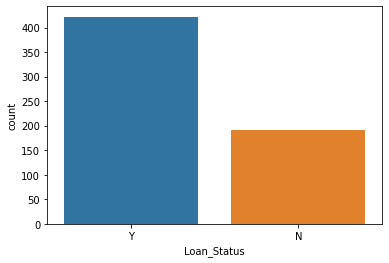

In [13]:
sns.countplot(df['Loan_Status'])

Observations :-

Loan of the applicants have more approved than rejected in the dataset.

## **Data Visualizations:**

To check missing valuesTo check missing values.

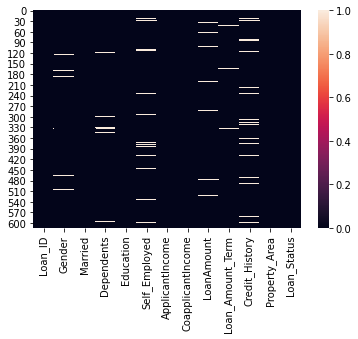

In [14]:
sns.heatmap(df.isnull())

Observations :-

Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History have null values.

## **Treating Null Values:**

In [15]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [16]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [17]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [18]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
df['LoanAmount'].mean()

146.41216216216216

In [20]:
df['LoanAmount'].median()

128.0

In [21]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [22]:

df['Loan_Amount_Term'].mean()

342.0

In [23]:
df['Loan_Amount_Term'].median()

360.0

In [24]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [25]:

df['Credit_History'].mean()

0.8421985815602837

In [26]:
df['Credit_History'].median()


1.0

In [27]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Bivariate Analysis:**

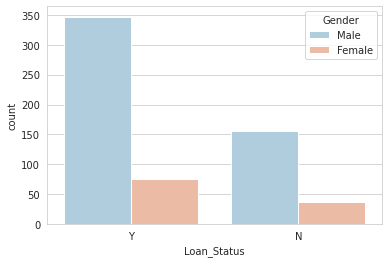

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Gender',data=df,palette='RdBu_r')

Observations :-

Loan of male applicants have more approved than female applicants in the dataset.

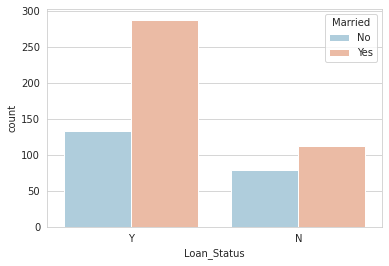

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Married',data=df,palette='RdBu_r')

Observations :-

Loan of married applicants have more approved than unmarried applicants in the dataset.

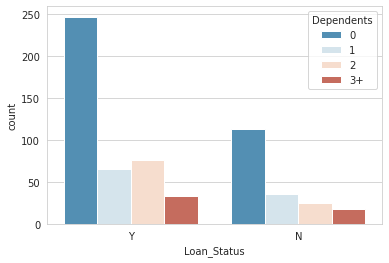

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Dependents',data=df,palette='RdBu_r')

Observations :-

1) Loan of the applicants who have 0 dependents under them have approved the most.

2) Loan of the applicants who have 3 dependents under them have approved the least.

3) Loan of the applicants who have 2 dependents under them have also approved in good amount.

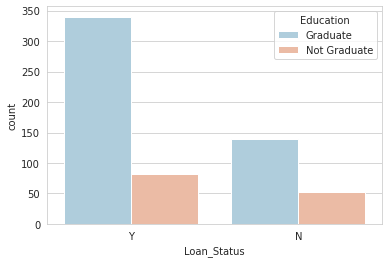

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Education',data=df,palette='RdBu_r')

Observations :-

Loan of graduated applicants have more approved than ungraduated applicants in the dataset.

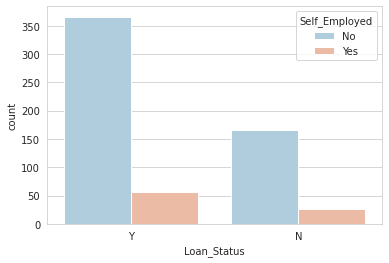

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df,palette='RdBu_r')

Observations :-

Loan of self employed applicants have more rejected than approved in the dataset.

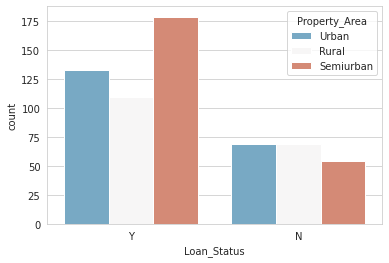

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Property_Area',data=df,palette='RdBu_r')

Observations :-

1) Loan of semiurban applicants have accepted the most in the dataset.

2) Loan of rural applicants have rejected the most in the dataset.

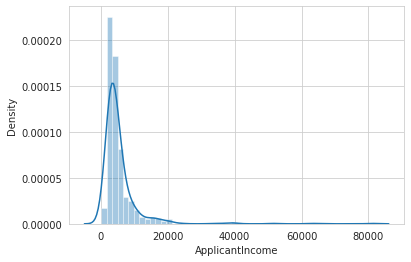

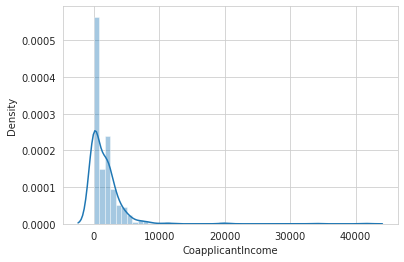

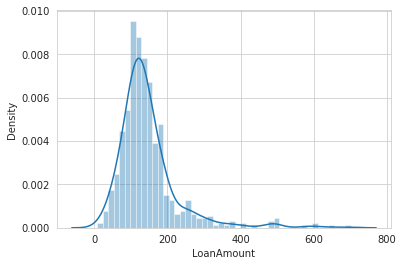

In [35]:
df_int_types_1=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']
for i in df_int_types_1:
    sns.distplot(df[i])
    plt.show()

Observations :-

1) Loan applicants with income between 0 to 5000 are present in maximum number in the dataset.

2) Loan applicants with loan amount between 100 to 200 are present in maximum number in the dataset.

3) Loan applicants with coapplicantincome between 0 to 5000 are present in maximum number in the dataset.

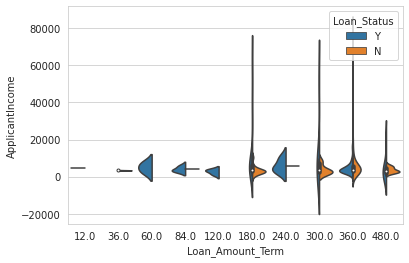

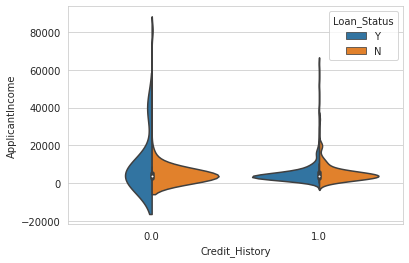

In [36]:
df_int_types_2=['Loan_Amount_Term', 'Credit_History']
for i in df_int_types_2:
    sns.violinplot(x=i,y='ApplicantIncome',data=df,hue='Loan_Status',split=True)
    plt.show()


Observations :-

1) Loans with terms of amount as 240 and 60 have approved the most.

2) Loans of applicants who have credit history have approved the most.

## **Dropping of Columns:**

In [37]:
df.drop('Loan_ID',axis=1,inplace=True)

## **Label Encoding:**

In [38]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

In [39]:
df_str_types

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [40]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in df_str_types:
    df[value]=LE.fit_transform(df[value])
    print(df[value].value_counts())

1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
0    480
1    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
1    233
2    202
0    179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


In [41]:
dfcorr=df.corr()
dfcorr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


## **Multivariate Analysis:**

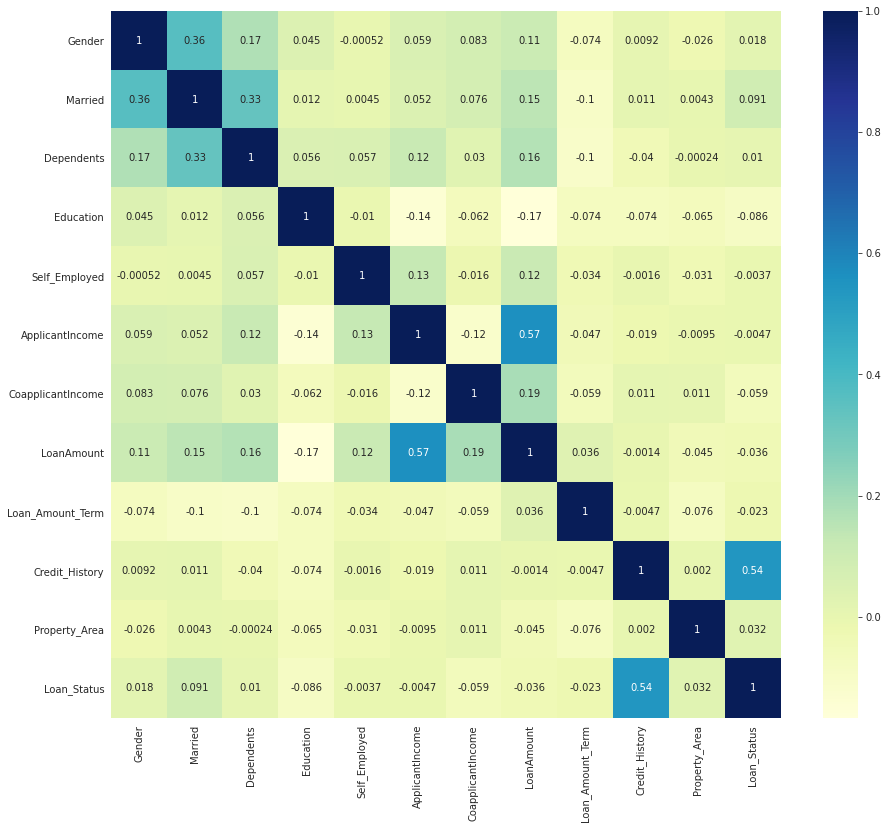

In [42]:
plt.figure(figsize=(15,13))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

Observations :-

1) Loan Status is highly positively correlated to the credit history of applicants.

2) Credit history of applicants is highly negatively correlated to the education of applicants.

3) Edcation of applicants is highly positively correlated to the number of dependents.

4) Edcation of applicants is highly negatively correlated to the status of loan.

## **Plotting Outliers:**

In [43]:
df.shape

(614, 12)

Gender                  AxesSubplot(0.125,0.125;0.0545775x0.755)
Married              AxesSubplot(0.190493,0.125;0.0545775x0.755)
Dependents           AxesSubplot(0.255986,0.125;0.0545775x0.755)
Education            AxesSubplot(0.321479,0.125;0.0545775x0.755)
Self_Employed        AxesSubplot(0.386972,0.125;0.0545775x0.755)
ApplicantIncome      AxesSubplot(0.452465,0.125;0.0545775x0.755)
CoapplicantIncome    AxesSubplot(0.517958,0.125;0.0545775x0.755)
LoanAmount           AxesSubplot(0.583451,0.125;0.0545775x0.755)
Loan_Amount_Term     AxesSubplot(0.648944,0.125;0.0545775x0.755)
Credit_History       AxesSubplot(0.714437,0.125;0.0545775x0.755)
Property_Area         AxesSubplot(0.77993,0.125;0.0545775x0.755)
Loan_Status          AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

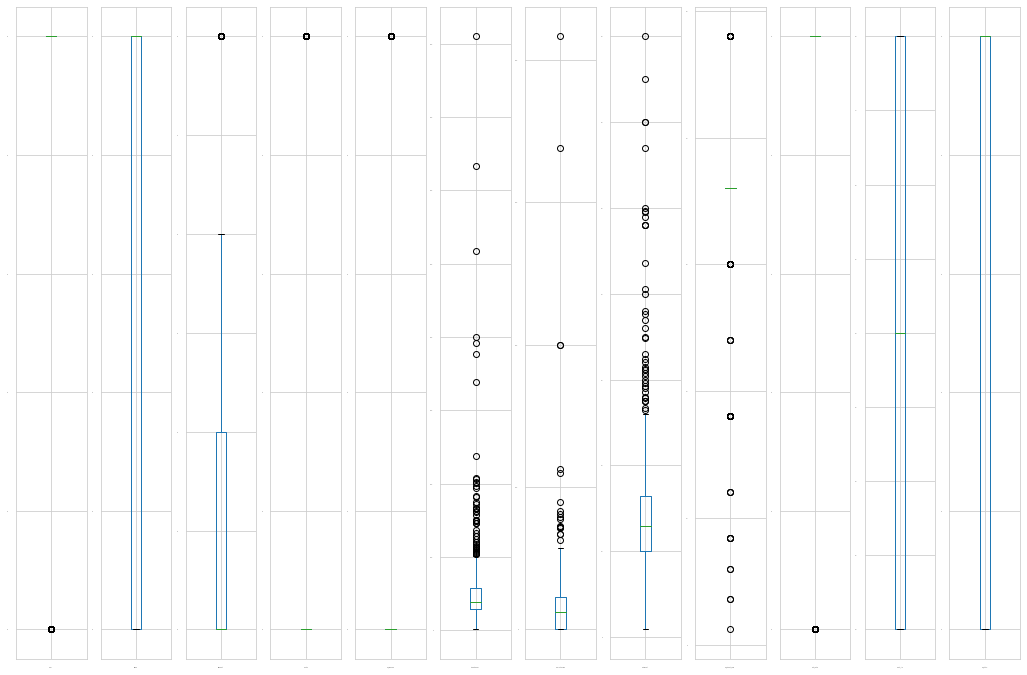

In [44]:
df.plot(kind='box',subplots=True,layout=(1,12),sharex=False,fontsize=1,figsize=(18,12))

Observations :-

Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History have outliers.

## **Removing Outliers:**

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [46]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7]))


In [47]:
df_new=df[(z<3).all(axis=1)]

In [48]:

df_new.shape

(577, 12)

In [49]:
df.shape

(614, 12)

In [50]:
df=df_new

In [51]:
((614-577)/614)*100

6.026058631921824

## **checking Skewness:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d1427dd0>,
      dtype=object)

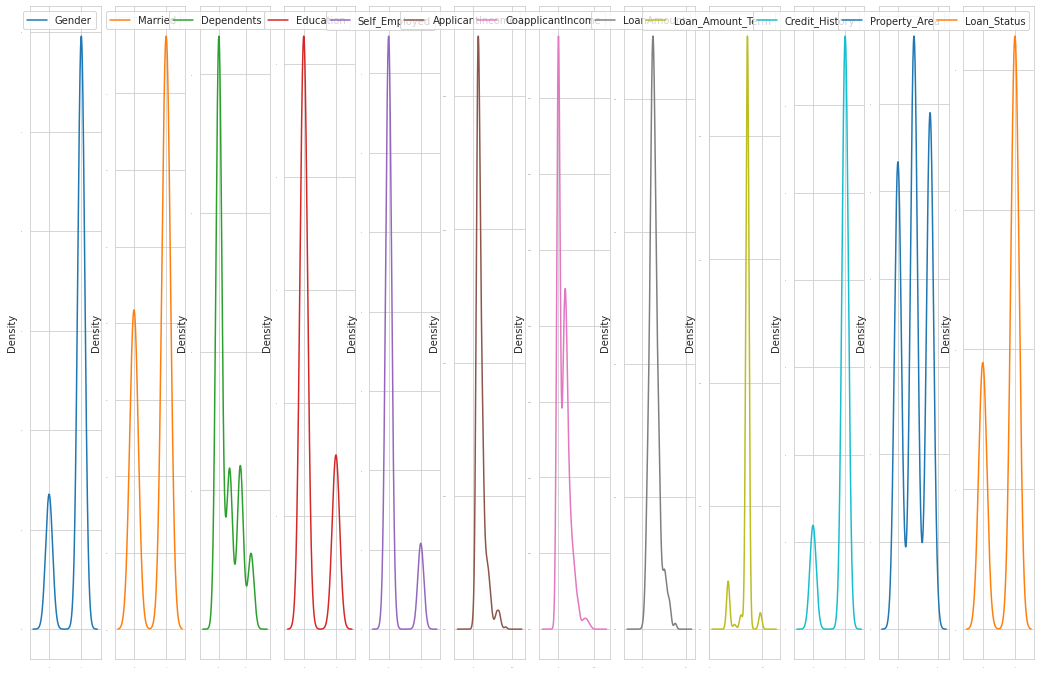

In [52]:
df.plot(kind='density',subplots=True,layout=(1,12),sharex=False,fontsize=1,figsize=(18,12))

Observations :-

1) Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome and LoanAmount are right skewed.

2) Gender, Married, Loan_Amount_Term, Credit_History and Loan_Status are left skewed.

In [53]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [54]:
df_rs=['Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [55]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [56]:
df_rs=['Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [57]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.457371
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.638310
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [58]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## **Train Test Split:**

In [59]:
x=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y=df['Loan_Status']

## **Scaling of Data:**

In [60]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [61]:
x

array([[ 0.47713685, -1.36251079, -0.8123454 , ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.96391602, ...,  0.23085296,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.8123454 , ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.96391602, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.29999732, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.8123454 , ...,  0.23085296,
        -2.38941464, -0.03952504]])

In [62]:
x=pd.DataFrame(x)

In [63]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.477137,-1.362511,-0.812345,-0.541961,-0.380580,0.644091,-1.048379,0.287444,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.963916,-0.541961,-0.380580,0.181506,0.444242,-0.047549,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.812345,-0.541961,2.627567,-0.558001,-1.048379,-1.406327,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.812345,1.845150,-0.380580,-0.801022,0.818090,-0.200590,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.812345,-0.541961,-0.380580,0.694078,-1.048379,0.191277,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.812345,-0.541961,-0.380580,-0.613850,-1.048379,-1.277630,0.230853,0.418513,-1.306522
573,0.477137,0.733939,1.525346,-0.541961,-0.380580,-0.017885,-1.048379,-2.172895,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.963916,-0.541961,-0.380580,1.299876,-0.452917,1.908726,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.299997,-0.541961,-0.380580,1.168493,-1.048379,0.958258,0.230853,0.418513,1.227472


In [64]:
x.columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [65]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.812345,-0.541961,-0.380580,0.644091,-1.048379,0.287444,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.963916,-0.541961,-0.380580,0.181506,0.444242,-0.047549,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.812345,-0.541961,2.627567,-0.558001,-1.048379,-1.406327,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.812345,1.845150,-0.380580,-0.801022,0.818090,-0.200590,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.812345,-0.541961,-0.380580,0.694078,-1.048379,0.191277,0.230853,0.418513,1.227472


## **Algorithm:**

In [66]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.8346456692913385
[[14 20]
 [ 1 92]]
              precision    recall  f1-score   support

           0       0.93      0.41      0.57        34
           1       0.82      0.99      0.90        93

    accuracy                           0.83       127
   macro avg       0.88      0.70      0.73       127
weighted avg       0.85      0.83      0.81       127

Accuracy score of Logistic Regression is:
0.7952755905511811
[[19 25]
 [ 1 82]]
              precision    recall  f1-score   support

           0       0.95      0.43      0.59        44
           1       0.77      0.99      0.86        83

    accuracy                           0.80       127
   macro avg       0.86      0.71      0.73       127
weighted avg       0.83      0.80      0.77       127

Accuracy score of Logistic Regression is:
0.8110236220472441
[[14 23]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.93      0.38      0.54        

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=12)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.905511811023622
[[19 11]
 [ 1 96]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.90      0.99      0.94        97

    accuracy                           0.91       127
   macro avg       0.92      0.81      0.85       127
weighted avg       0.91      0.91      0.90       127



In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.7480314960629921
[[19 11]
 [21 76]]
              precision    recall  f1-score   support

           0       0.47      0.63      0.54        30
           1       0.87      0.78      0.83        97

    accuracy                           0.75       127
   macro avg       0.67      0.71      0.68       127
weighted avg       0.78      0.75      0.76       127



In [69]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.905511811023622
[[19 11]
 [ 1 96]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.90      0.99      0.94        97

    accuracy                           0.91       127
   macro avg       0.92      0.81      0.85       127
weighted avg       0.91      0.91      0.90       127



In [70]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of svm is:
0.905511811023622
[[19 11]
 [ 1 96]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.90      0.99      0.94        97

    accuracy                           0.91       127
   macro avg       0.92      0.81      0.85       127
weighted avg       0.91      0.91      0.90       127



In [71]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.889763779527559
[[19 11]
 [ 3 94]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.90      0.97      0.93        97

    accuracy                           0.89       127
   macro avg       0.88      0.80      0.83       127
weighted avg       0.89      0.89      0.88       127



K - Neighbors Classifier and Support Vector Classifier are the best algorithms.

## **Cross - Validation Scores:**

In [72]:
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.76724138 0.75       0.77391304 0.80869565 0.79130435]
0.7782308845577212 0.020176289687744115


In [73]:
svmscores=cross_val_score(svm,x,y,cv=5)
print(svmscores)
print(svmscores.mean(),svmscores.std())

[0.81896552 0.78448276 0.79130435 0.86086957 0.83478261]
0.8180809595202397 0.028129764814348753


In [74]:
list1=[0.905511811023622,0.905511811023622]
list2=[0.7851724137931034,0.8180809595202397]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.12033939723051856, 0.08743085150338226]


As the difference between accuracy scores and cross validation scores of Support Vector Classifier is least. So, It is verified that Support Vector Classifier is the best algorithm for this model with accuracy of 90.551 % .

## **Hyper Parameter Tuning:**

In [75]:
svm=SVC()
grid_param={'C': [0.1, 1, 10,100], 'gamma': [1, 0.1, 0.01],'kernel' : ['linear', 'poly', 'rbf','sigmoid'],'decision_function_shape' : ['ovo', 'ovr']}
gd_sr=GridSearchCV(estimator=svm,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [76]:
gd_sr.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}

In [77]:
svm=SVC(C= 0.1, gamma = 1, kernel= 'linear',decision_function_shape= 'ovo',probability=True)
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of svm is:
0.905511811023622
[[19 11]
 [ 1 96]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.90      0.99      0.94        97

    accuracy                           0.91       127
   macro avg       0.92      0.81      0.85       127
weighted avg       0.91      0.91      0.90       127



Accuracy of Random Forest Classifier has remained same as 90.551% with hyper parameter tuning.

## **AOC - ROC Curve:**

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:
y_pred_prob=svm.predict_proba(x_test)[:,1]

In [80]:
y_pred_prob

array([0.76987297, 0.76984239, 0.76985313, 0.08158595, 0.76991126,
       0.76984897, 0.76989432, 0.76988016, 0.76984254, 0.76990201,
       0.76990732, 0.76994096, 0.769887  , 0.76988049, 0.76988341,
       0.76987032, 0.76990967, 0.76990106, 0.76981493, 0.76981528,
       0.76987477, 0.76990416, 0.0816242 , 0.76981591, 0.76988086,
       0.76984802, 0.76986267, 0.76993983, 0.7698418 , 0.76987822,
       0.76985812, 0.76982567, 0.76986637, 0.76981539, 0.76984949,
       0.08157213, 0.76985567, 0.76985921, 0.76984429, 0.76981063,
       0.76983425, 0.76984831, 0.76985502, 0.76981768, 0.76979986,
       0.76980434, 0.76982199, 0.08158323, 0.76992346, 0.08157101,
       0.76981078, 0.76985042, 0.76991362, 0.76987414, 0.08159007,
       0.76987455, 0.76987755, 0.76982834, 0.76984791, 0.76989012,
       0.76987226, 0.76986347, 0.7698453 , 0.76984092, 0.76985423,
       0.76986163, 0.76984667, 0.76994015, 0.08158889, 0.08161892,
       0.76984243, 0.7698487 , 0.08159541, 0.76996128, 0.76989

In [81]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [82]:
fpr

array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
       0.06666667, 0.06666667, 0.1       , 0.1       , 0.13333333,
       0.13333333, 0.16666667, 0.16666667, 0.2       , 0.2       ,
       0.23333333, 0.23333333, 0.26666667, 0.26666667, 0.3       ,
       0.3       , 0.33333333, 0.33333333, 0.36666667, 0.36666667,
       0.43333333, 0.43333333, 1.        ])

In [83]:
tpr

array([0.        , 0.01030928, 0.10309278, 0.10309278, 0.34020619,
       0.34020619, 0.40206186, 0.40206186, 0.50515464, 0.50515464,
       0.53608247, 0.53608247, 0.56701031, 0.56701031, 0.62886598,
       0.62886598, 0.65979381, 0.65979381, 0.82474227, 0.82474227,
       0.93814433, 0.93814433, 0.94845361, 0.94845361, 0.98969072,
       0.98969072, 1.        , 1.        ])

In [84]:
thresholds

array([1.76996128, 0.76996128, 0.76990967, 0.76990874, 0.76988049,
       0.76988016, 0.76987477, 0.76987455, 0.76986347, 0.76986267,
       0.76985921, 0.76985812, 0.76985512, 0.76985502, 0.76985025,
       0.76984949, 0.76984831, 0.76984802, 0.76983606, 0.76983425,
       0.76981493, 0.7698121 , 0.76981078, 0.76981063, 0.76979679,
       0.08161892, 0.08160091, 0.08154575])

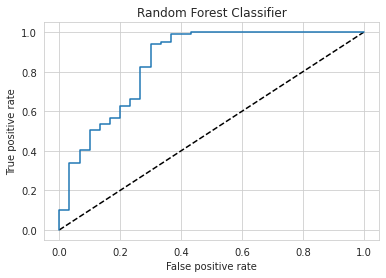

In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

Observations :-

As the line is moving towards 1, so we can conclude that we have developed good model.

## **Saving the model:**

In [86]:
import joblib
joblib.dump(svm,"svm_loan_status.obj")

['svm_loan_status.obj']